In [ ]:
%pip install seaborn

In [2]:
import yaml
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt

In [3]:
params_dir = "../config/config.yaml"

In [4]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [5]:
params = load_params(params_dir)
params

{'dataset_dir': 'data/raw/',
 'datetime_columns': ['tanggal'],
 'int32_columns': ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max'],
 'label': 'categori',
 'label_categories': ['BAIK', 'SEDANG', 'TIDAK SEHAT'],
 'label_categories_new': ['BAIK', 'TIDAK BAIK'],
 'missing_value_co': 11,
 'missing_value_no2': 18,
 'missing_value_o3': 29,
 'missing_value_pm10': {'BAIK': 28, 'TIDAK BAIK': 55},
 'missing_value_pm25': {'BAIK': 38, 'TIDAK BAIK': 82},
 'missing_value_so2': 35,
 'object_columns': ['stasiun', 'critical', 'categori'],
 'predictors': ['stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2'],
 'range_co': [-1, 100],
 'range_no2': [-1, 100],
 'range_o3': [-1, 160],
 'range_pm10': [-1, 800],
 'range_pm25': [-1, 400],
 'range_so2': [-1, 500],
 'range_stasiun': ['DKI1 (Bunderan HI)',
  'DKI2 (Kelapa Gading)',
  'DKI3 (Jagakarsa)',
  'DKI4 (Lubang Buaya)',
  'DKI5 (Kebon Jeruk) Jakarta Barat']}

In [27]:
x_train = joblib.load("../data/processed/x_train.pkl")
y_train = joblib.load("../data/processed/y_train.pkl")

In [28]:
x_train

,stasiun,pm10,pm25,so2,co,o3,no2
1527,DKI1 (Bunderan HI),25,42,20,8,18,22
433,DKI5 (Kebon Jeruk) Jakarta Barat,57,86,-1,16,19,30
1357,DKI5 (Kebon Jeruk) Jakarta Barat,24,35,21,7,22,9
1136,DKI2 (Kelapa Gading),38,55,24,11,68,7
1097,DKI1 (Bunderan HI),72,108,14,43,44,20
...,...,...,...,...,...,...,...
1802,DKI5 (Kebon Jeruk) Jakarta Barat,46,74,33,7,26,18
1433,DKI3 (Jagakarsa),35,55,42,7,29,9
977,DKI2 (Kelapa Gading),82,112,56,12,41,27
983,DKI3 (Jagakarsa),60,84,47,7,23,18


In [29]:
y_train

1527           BAIK
433          SEDANG
1357           BAIK
1136         SEDANG
1097    TIDAK SEHAT
           ...     
1802         SEDANG
1433         SEDANG
977     TIDAK SEHAT
983          SEDANG
747          SEDANG
Name: categori, Length: 1269, dtype: object

In [30]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,categori
1527,DKI1 (Bunderan HI),25,42,20,8,18,22,BAIK
433,DKI5 (Kebon Jeruk) Jakarta Barat,57,86,-1,16,19,30,SEDANG
1357,DKI5 (Kebon Jeruk) Jakarta Barat,24,35,21,7,22,9,BAIK
1136,DKI2 (Kelapa Gading),38,55,24,11,68,7,SEDANG
1097,DKI1 (Bunderan HI),72,108,14,43,44,20,TIDAK SEHAT
...,...,...,...,...,...,...,...,...
1802,DKI5 (Kebon Jeruk) Jakarta Barat,46,74,33,7,26,18,SEDANG
1433,DKI3 (Jagakarsa),35,55,42,7,29,9,SEDANG
977,DKI2 (Kelapa Gading),82,112,56,12,41,27,TIDAK SEHAT
983,DKI3 (Jagakarsa),60,84,47,7,23,18,SEDANG


In [31]:
dataset.replace(-1, np.nan, inplace=True)

In [32]:
dataset.isna().sum()

stasiun      0
pm10        35
pm25        55
so2         68
co          10
o3          35
no2          9
categori     0
dtype: int64

**[ CHECK SKEWNESS OF DATA ]**

In [33]:
dataset.skew(numeric_only=True)

pm10   -0.196274
pm25    0.315916
so2     0.137343
co      1.720796
o3      1.688855
no2     0.804295
dtype: float64

In [34]:
# Split dataset into 2 class 
dataset_baik = dataset[dataset.categori == "BAIK"].copy()
dataset_tidak_baik = dataset[dataset.categori != "BAIK"].copy()

In [35]:
# Class 1
dataset_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,127.000000,97.000000,129.00000,132.000000,129.000000,126.000000
mean,28.259843,38.298969,25.27907,8.621212,26.147287,10.936508
std,7.966410,8.305577,11.15584,4.559246,11.102576,6.954418
min,14.000000,13.000000,3.00000,2.000000,7.000000,3.000000
25%,23.000000,33.000000,17.00000,6.000000,16.000000,6.000000
50%,27.000000,39.000000,23.00000,8.000000,24.000000,9.000000
75%,32.000000,45.000000,36.00000,11.000000,35.000000,13.000000
max,50.000000,50.000000,49.00000,28.000000,49.000000,49.000000


In [36]:
# Class 0
dataset_tidak_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,1107.000000,1117.000000,1072.000000,1127.000000,1105.000000,1134.000000
mean,55.427281,82.760072,36.512127,11.989352,32.390950,20.354497
std,13.009139,22.550256,12.188599,4.862941,14.769274,8.824437
min,19.000000,21.000000,5.000000,3.000000,9.000000,1.000000
25%,48.000000,67.000000,27.000000,9.000000,23.000000,14.000000
50%,56.000000,81.000000,37.000000,11.000000,29.000000,19.000000
75%,63.500000,96.000000,45.000000,14.000000,38.000000,26.000000
max,100.000000,174.000000,82.000000,44.000000,151.000000,65.000000


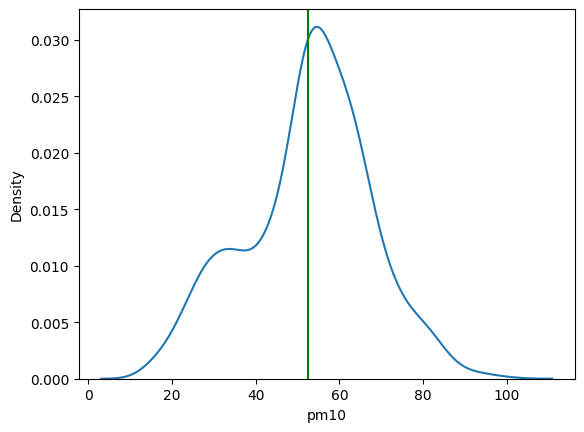

In [37]:
# plot untuk melihat distribusi pm10 jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm10")
plt.axvline(dataset.pm10.mean(), 0, 1, color = "g")

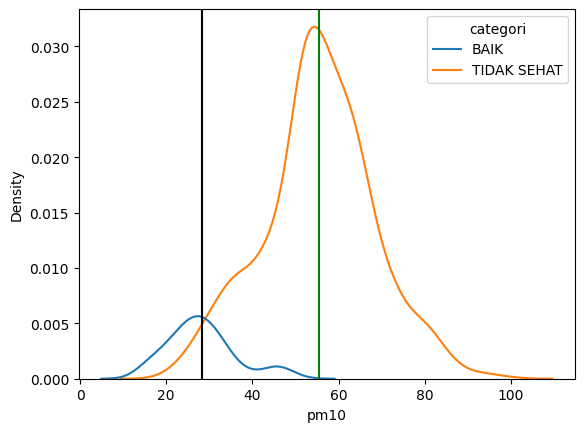

In [38]:
# plot untuk melihat distribusi pm10 jika dibedakan berdasarkan categori
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm10", hue = "categori")
plt.axvline(dataset_tidak_baik.pm10.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.pm10.mean(), 0, 1, color = "k")

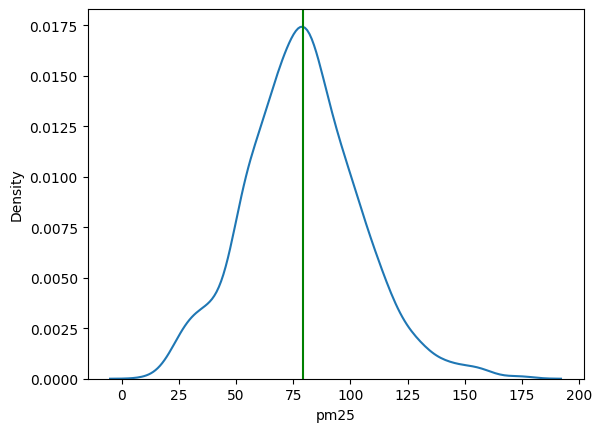

In [39]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm25")
plt.axvline(dataset.pm25.mean(), 0, 1, color = "g")

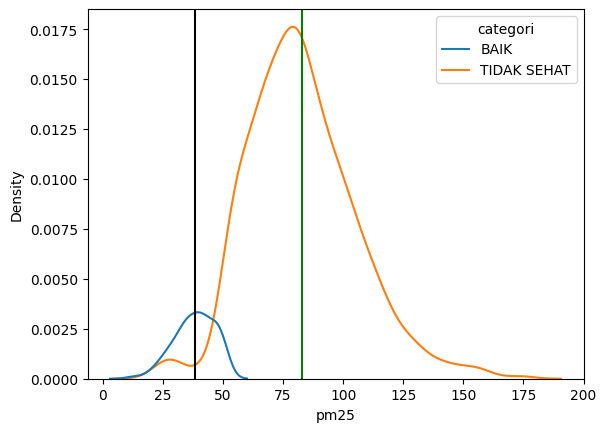

In [19]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "pm25", hue="categori")
plt.axvline(dataset_tidak_baik.pm25.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.pm25.mean(), 0, 1, color = "k")

- distribusi sangat dekat dengan normal (nilai skew fisher-pearson mendekati nol), imputasi mean
- mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
- kesimpulan: untuk pm25 akan menggunakan mean dari perkelas untuk imputasi

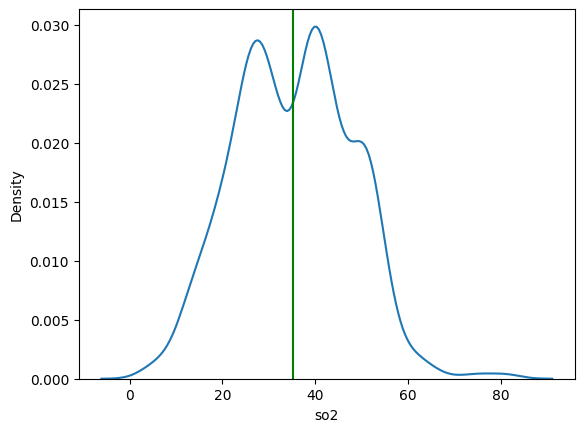

In [47]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "so2")
plt.axvline(dataset.so2.mean(), color = "g")

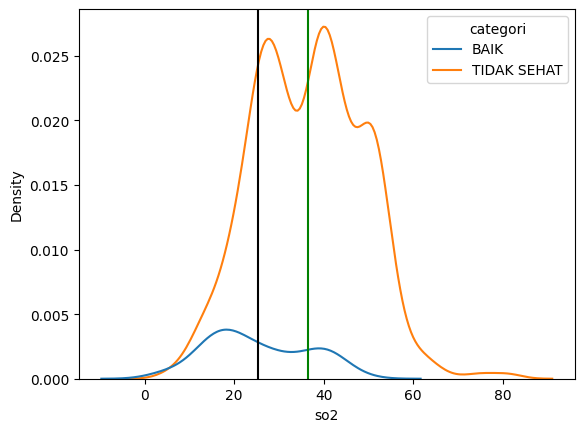

In [43]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "so2", hue = "categori")
plt.axvline(dataset_tidak_baik.so2.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.so2.mean(), 0, 1, color = "k")

- Data so2 terdistribusi dengan baik, skewness hampir mendekati 0
- Mean dari dataset_baik & dataset_tidak_baik tidak terpaut jauh

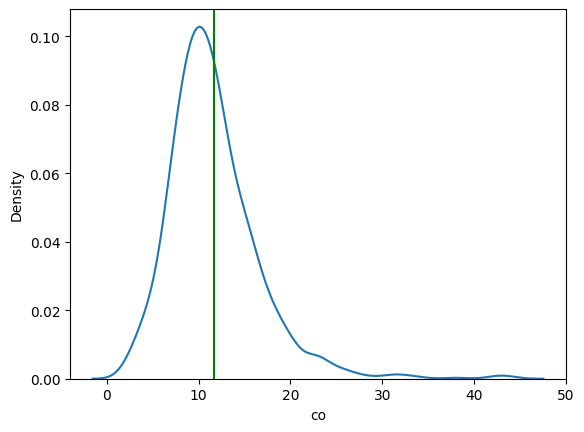

In [ ]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "co")
plt.axvline(dataset.co.mean(), 0, 1, color = "g")

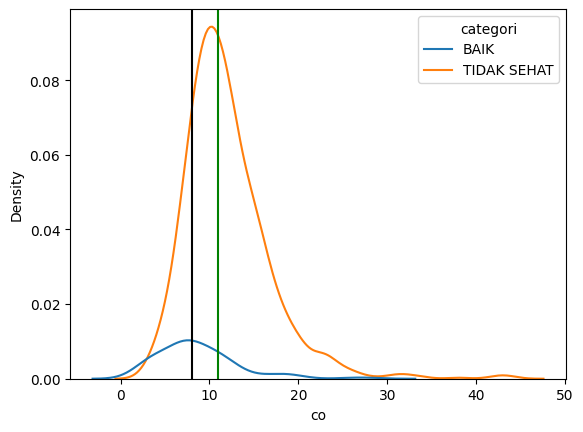

In [50]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "co", hue = "categori")
plt.axvline(dataset_tidak_baik.co.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.co.median(), 0, 1, color = "k")

- Distribusi dari data "co" mengalami skewness, skew ke arah kanan (positive)
- Gunakan median agar tidak terpengaruh outliers
- Dikarenakan nilai median yang tidak terlalu jauh, maka gunakan median dari kedua class tersebut

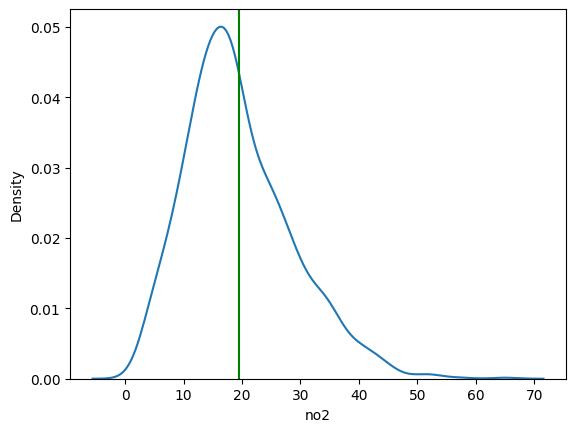

In [51]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "no2")
plt.axvline(dataset.no2.mean(), 0, 1, color = "g")

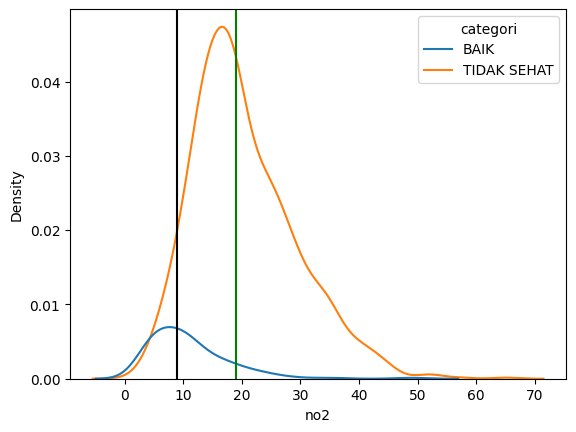

In [52]:
sns.kdeplot(data = dataset.replace("SEDANG", "TIDAK SEHAT"), x = "no2", hue = "categori")
plt.axvline(dataset_tidak_baik.no2.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.no2.median(), 0, 1, color = "k")

<Axes: >

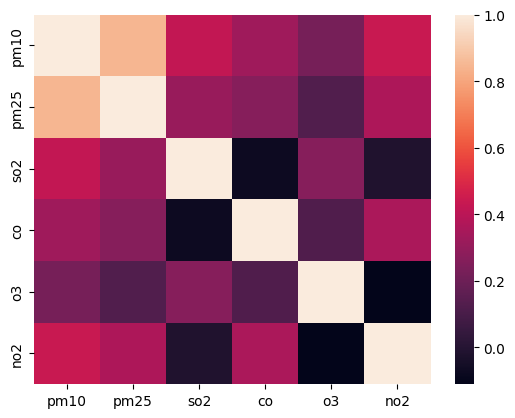

In [53]:
sns.heatmap(dataset.corr(numeric_only = True))

# T Test untuk PM10
- h0    = mean pm10 untuk kelas 0 = mean pm10 untuk kelas 1
- h1    = mean pm10 untuk kelas 0 != mean pm10 untuk kelas 1

In [57]:
# dataset_baik[dataset_baik.pm10.isnull() == True]
dataset_tidak_baik[dataset_tidak_baik.pm10.isnull() == True]

,stasiun,pm10,pm25,so2,co,o3,no2,categori
535,DKI3 (Jagakarsa),NaN,86.0,49.0,11.0,29.0,1.0,SEDANG
1596,DKI3 (Jagakarsa),NaN,69.0,27.0,15.0,NaN,16.0,SEDANG
273,DKI4 (Lubang Buaya),NaN,79.0,NaN,NaN,NaN,NaN,SEDANG
534,DKI3 (Jagakarsa),NaN,58.0,43.0,6.0,25.0,4.0,SEDANG
110,DKI4 (Lubang Buaya),NaN,99.0,44.0,9.0,32.0,20.0,SEDANG
529,DKI3 (Jagakarsa),NaN,94.0,19.0,11.0,25.0,14.0,SEDANG
113,DKI4 (Lubang Buaya),NaN,109.0,46.0,8.0,21.0,18.0,TIDAK SEHAT
243,DKI4 (Lubang Buaya),NaN,91.0,45.0,10.0,35.0,33.0,SEDANG
119,DKI4 (Lubang Buaya),NaN,117.0,45.0,13.0,40.0,27.0,TIDAK SEHAT
531,DKI3 (Jagakarsa),NaN,79.0,21.0,8.0,33.0,14.0,SEDANG


In [54]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.pm10.isnull() != True].pm10,
    dataset_tidak_baik[dataset_tidak_baik.pm10.isnull() != True].pm10
)

TtestResult(statistic=np.float64(-23.03890903177555), pvalue=np.float64(5.926662098072182e-98), df=np.float64(1232.0))

- pValue yang dihasilkan adalah sekitar 5.93 x 10^(-8). pValue yang sangat kecil ini menunjukkan bahwa perbedaan antara kedua kelompok adalah sangat signifikan secara statistik. Biasanya, jika pValue < 0.05, kita menolak hipotesis nol yang menyatakan bahwa "tidak ada perbedaan antara kedua kelompok".

In [ ]:
# nilai t critical untuk alpha 0.05
# rumus df = n1 + n2 - 2
# n1 = len of data[kelas1]
# n2 = len of data[kelas2]
scs.t.ppf(0.05, df = (len(dataset) - 2))

np.float64(-1.64605717129089)

- dengan nilai t-value (statistic pada TestResult = -23.0389) < t-critical (-1.6460) dan nilai p-value < 0.05 maka h0 di reject
- mean antara kelas 0 dan kelas 1 untuk pm10 statistically significant

# T Test untuk PM25
- h0    = mean pm25 untuk kelas 0 = mean pm25 untuk kelas 1
- h1    = mean pm25 untuk kelas 0 != mean pm25 untuk kelas 1

In [58]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.pm25.isnull() != True].pm25,
    dataset_tidak_baik[dataset_tidak_baik.pm25.isnull() != True].pm25
)

TtestResult(statistic=np.float64(-19.298865811060065), pvalue=np.float64(1.413091762591775e-72), df=np.float64(1212.0))

In [59]:
scs.t.ppf(0.05, df = (len(dataset) - 2))

np.float64(-1.64605717129089)

- Hasilnya sama seperti sebelumnya h0 ditolak, mean antara kelas 0 dan kelas 1 untuk pm25 statistically significant maka dari itu gunakan nilai mean dari masing2 kelas

# T Test untuk SO2
- h0    = mean so2 untuk kelas 0 = mean so2 untuk kelas 1
- h1    = mean so2 untuk kelas 0 != mean so2 untuk kelas 1

In [60]:
scs.ttest_ind(
    dataset_baik[dataset_baik.so2.isnull() != True].so2,
    dataset_tidak_baik[dataset_tidak_baik.so2.isnull() != True].so2
)

TtestResult(statistic=np.float64(-9.97607953790784), pvalue=np.float64(1.4294113813260584e-22), df=np.float64(1199.0))

In [62]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))
print(f"t-critical = {scs.t.ppf(0.05, df = (len(dataset) - 2))}")

t-critical = -1.64605717129089


dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject karena mean antara kelas 0 dan kelas 1 untuk so2 statistically significant

# T Test untuk CO
- h0    = mean co untuk kelas 0 = mean co untuk kelas 1
- h1    = mean co untuk kelas 0 != mean co untuk kelas 1

In [63]:
scs.ttest_ind(
    dataset_baik[dataset_baik.co.isnull() != True].co,
    dataset_tidak_baik[dataset_tidak_baik.co.isnull() != True].co
)

TtestResult(statistic=np.float64(-7.5767489321394645), pvalue=np.float64(6.843760773275538e-14), df=np.float64(1257.0))

In [64]:
scs.t.ppf(0.05, df = (len(dataset) - 2))

np.float64(-1.64605717129089)

- maka h0 ditolak karena nilai t-value (-7.576) < t-critical (-1.646) dan pValue (6.843 x 10^(-14))  < 0,05 sehingga h0 ditolak. maka nilai mean pada kelas 0 dan kelas 1 statistically significant

# T Test untuk O3
- h0    = mean o3 untuk kelas 0 = mean o3 untuk kelas 1
- h1    = mean o3 untuk kelas 0 != mean o3 untuk kelas 1

In [65]:
scs.ttest_ind(
    dataset_baik[dataset_baik.o3.isnull() != True].o3,
    dataset_tidak_baik[dataset_tidak_baik.o3.isnull() != True].o3,
    equal_var = False
)

TtestResult(statistic=np.float64(-5.8147582595935665), pvalue=np.float64(2.6119427965574716e-08), df=np.float64(185.43084409304618))

In [66]:
scs.t.ppf(0.05, df = (len(dataset) - 2))

np.float64(-1.64605717129089)

# T Test untuk NO2
- h0    = mean no2 untuk kelas 0 = mean no2 untuk kelas 1
- h1    = mean no2 untuk kelas 0 != mean no2 untuk kelas 1

In [67]:
scs.ttest_ind(
    dataset_baik[dataset_baik.no2.isnull() != True].no2,
    dataset_tidak_baik[dataset_tidak_baik.no2.isnull() != True].no2
)

TtestResult(statistic=np.float64(-11.585410291439977), pvalue=np.float64(1.4565248067047608e-29), df=np.float64(1258.0))

In [68]:
scs.t.ppf(0.05, df = (len(dataset) - 2))

np.float64(-1.64605717129089)

- maka h0 ditolak karena nilai t-value (-11.585) < t-critical (-1.646) dan pValue (1.456 x 10^(-29))  < 0,05 sehingga h0 ditolak. maka nilai mean pada kelas 0 dan kelas 1 statistically significant